In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat, OmegaTFT
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.axelrod_second import (
    Borufsen,
    Champion,
    Leyvraz,
    SecondByBlackK83R,
    SecondByCave,
    SecondByGraaskampKatzen,
    SecondByHarrington,
    SecondByTidemanAndChieruzzi,
    SecondByWeiner,
    SecondByWhiteK72R,
    SecondByWmAdams,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
agents = [TitForTat, Pavlov, SecondByWeiner, Borufsen, Leyvraz, SecondByWhiteK72R]

env = MultipleRuleBasedAgentEnvironment(agents)

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 10)
        self.layer2 = nn.Linear(10, 10)
        # self.layer3 = nn.Linear(6, 6)
        self.layer4 = nn.Linear(10, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    def __init__(self):
        super().__init__()

        self.lookback = 4
        self.epsilon = 0.2

        self._learning_rate = 0.01
        self._discount_rate = 0.95
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    limit=100,
    epochs=100,
)

[02:43:37] Commencement of training.
[02:43:39] Completed epoch 1: 2.3233333333333333
[02:43:40] Completed epoch 2: 2.3425
[02:43:41] Completed epoch 3: 2.3433333333333333
[02:43:41] Completed epoch 4: 2.332708333333333
[02:43:42] Completed epoch 5: 2.332666666666667
[02:43:43] Completed epoch 6: 2.3266666666666667
[02:43:44] Completed epoch 7: 2.3257142857142856
[02:43:45] Completed epoch 8: 2.312708333333333
[02:43:46] Completed epoch 9: 2.310277777777778
[02:43:47] Completed epoch 10: 2.31075
[02:43:48] Completed epoch 11: 2.3099242424242425
[02:43:49] Completed epoch 12: 2.30625
[02:43:49] Completed epoch 13: 2.3076923076923075
[02:43:50] Completed epoch 14: 2.300059523809524
[02:43:51] Completed epoch 15: 2.307611111111111
[02:43:52] Completed epoch 16: 2.3138020833333335
[02:43:53] Completed epoch 17: 2.3092156862745097
[02:43:54] Completed epoch 18: 2.311111111111111
[02:43:55] Completed epoch 19: 2.3060526315789476
[02:43:56] Completed epoch 20: 2.3035833333333335
[02:43:57] Co

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer4): Linear(in_features=10, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 53923, <Action.DEFECT: 1>: 6077}
{<Action.COOPERATE: 0>: 0.8987166666666667, <Action.DEFECT: 1>: 0.10128333333333334}


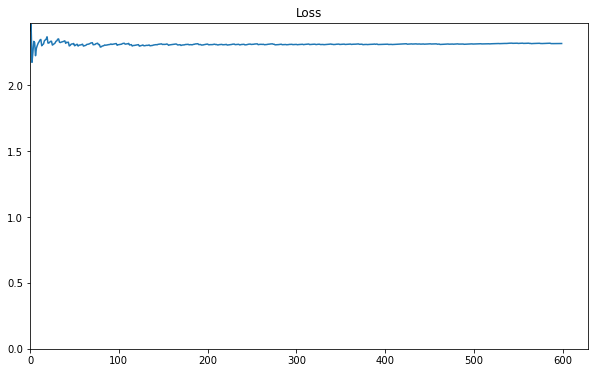

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

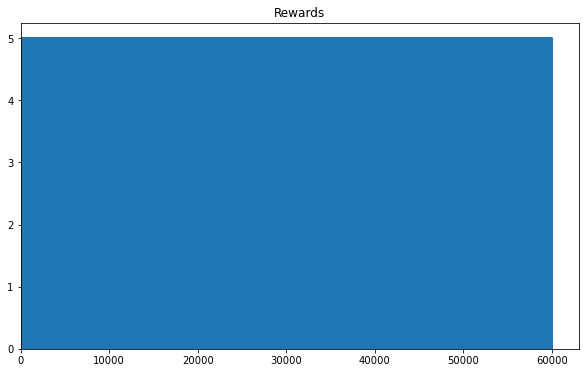

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

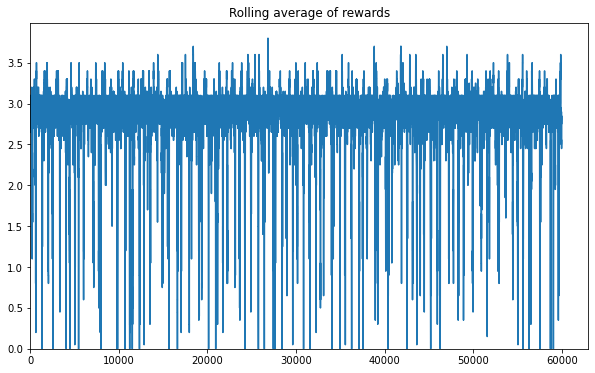

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

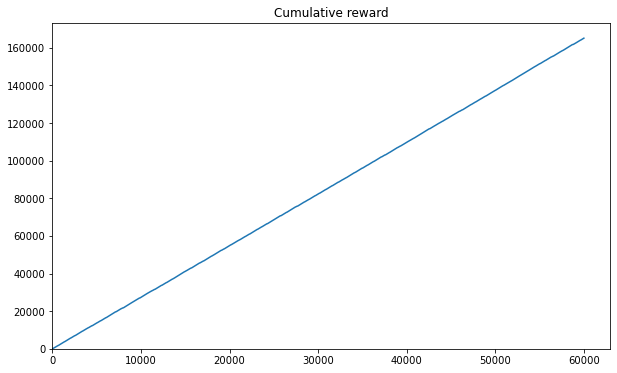

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

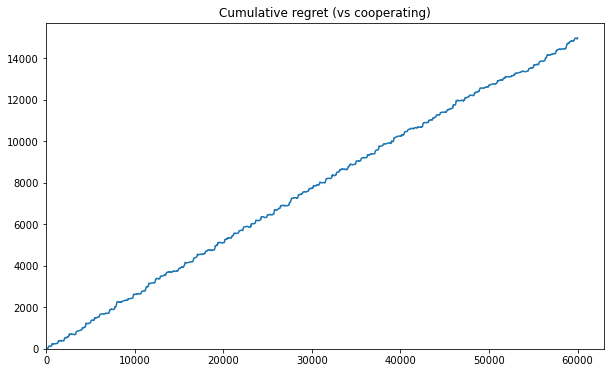

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.9116666666666666, <Action.DEFECT: 1>: 0.08833333333333333}, {<Action.COOPERATE: 0>: 0.915, <Action.DEFECT: 1>: 0.085}, {<Action.COOPERATE: 0>: 0.8766666666666667, <Action.DEFECT: 1>: 0.12333333333333334}, {<Action.COOPERATE: 0>: 0.9033333333333333, <Action.DEFECT: 1>: 0.09666666666666666}, {<Action.COOPERATE: 0>: 0.9, <Action.DEFECT: 1>: 0.1}, {<Action.COOPERATE: 0>: 0.8866666666666667, <Action.DEFECT: 1>: 0.11333333333333333}, {<Action.COOPERATE: 0>: 0.91, <Action.DEFECT: 1>: 0.09}, {<Action.COOPERATE: 0>: 0.8883333333333333, <Action.DEFECT: 1>: 0.11166666666666666}, {<Action.COOPERATE: 0>: 0.91, <Action.DEFECT: 1>: 0.09}, {<Action.COOPERATE: 0>: 0.91, <Action.DEFECT: 1>: 0.09}, {<Action.COOPERATE: 0>: 0.8933333333333333, <Action.DEFECT: 1>: 0.10666666666666667}, {<Action.COOPERATE: 0>: 0.8966666666666666, <Action.DEFECT: 1>: 0.10333333333333333}, {<Action.COOPERATE: 0>: 0.8866666666666667, <Action.DEFECT: 1>: 0.11333333333333333}, {<Action.COOPERATE: 0>: 0.

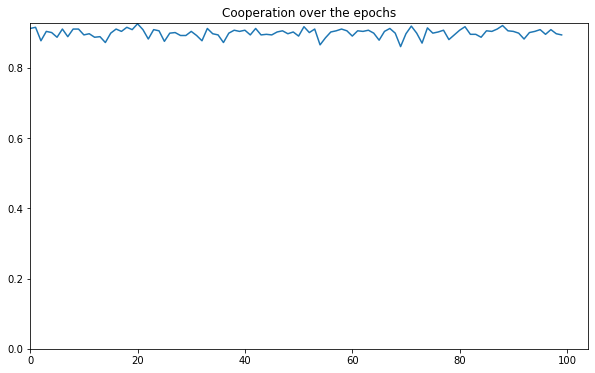

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer4): Linear(in_features=10, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:35<00:00, 10.04matches/s]

Champion                       807                  43.192211           
SecondByBlackK83R              787                  10.902088000000001  
Shubik                         782                  9.125127            
GradualTFT                     781                  84.656736           
TidemanAndChieruzzi            778                  9.699855999999999   
OmegaTFT                       776                  9.493938            
Borufsen                       771                  8.921363000000001   
SecondByWhiteK72R              771                  9.334045999999999   
SecondByTidemanAndChieruzzi    768                  9.579495999999999   
SecondByWeiner                 762                  21.264076           
TTFT                           760                  7.940229000000001   
SteinAndRapoport               758                  28.87757699999999   
Davis                          754                  13.370311000000003  
Grofman                        752                 